In [163]:
import numpy as np 
import pandas as pd

# Data Summary

In [355]:
data=pd.read_csv('BankChurners.csv')

In [356]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [357]:
data=data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
          'Dependent_count', 'Education_Level', 'Marital_Status',
          'Income_Category', 'Card_Category', 'Months_on_book',
          'Total_Relationship_Count', 'Months_Inactive_12_mon',
          'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
          'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
          
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [359]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [360]:
data.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [361]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [362]:
data.duplicated().any()

False

# Exploratory Data Analysis

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

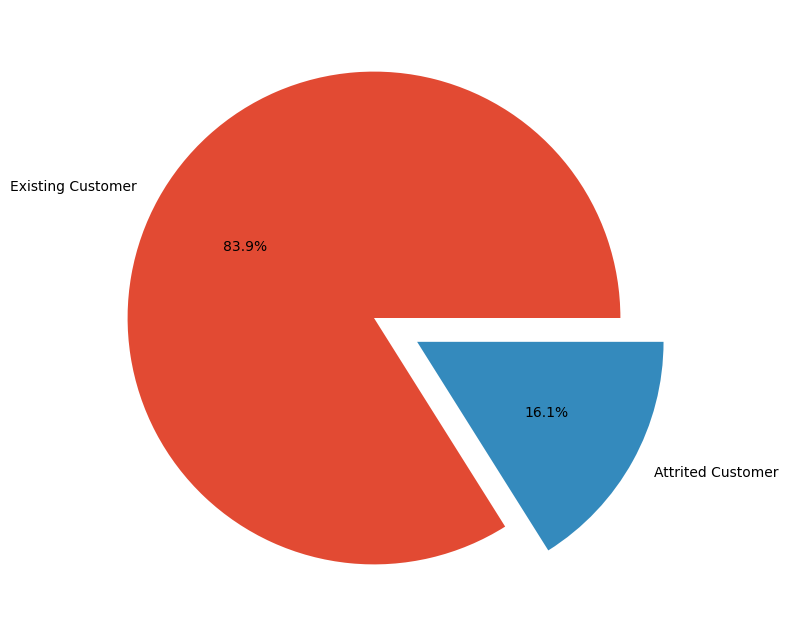

In [364]:
inter=data['Attrition_Flag'].value_counts()
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',explode=[0.0,0.2]);

**There is imbalance in class distribution of target variable**

In [365]:
def plot_num(var):
    
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=var,hue='Attrition_Flag',kde=True);
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=data);

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


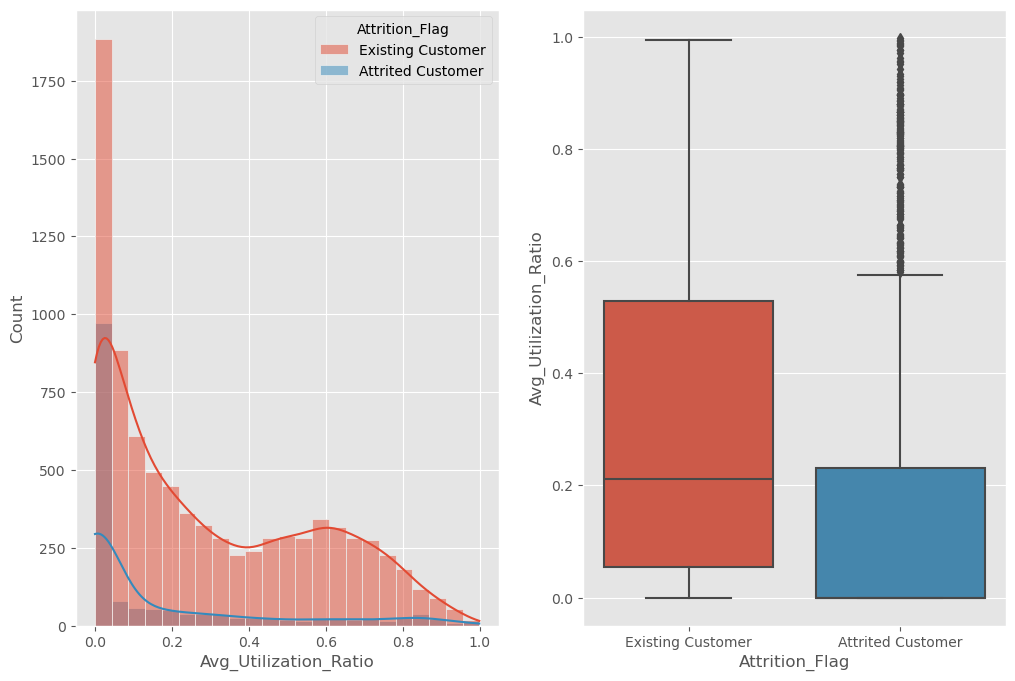

In [366]:
plot_num('Avg_Utilization_Ratio')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


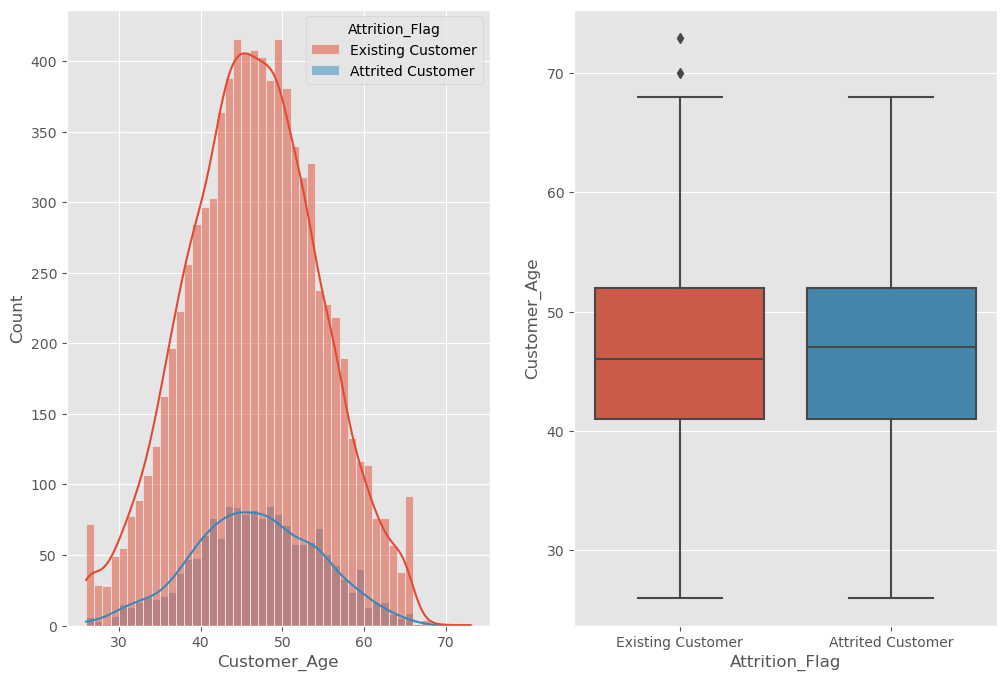

In [367]:
plot_num('Customer_Age')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


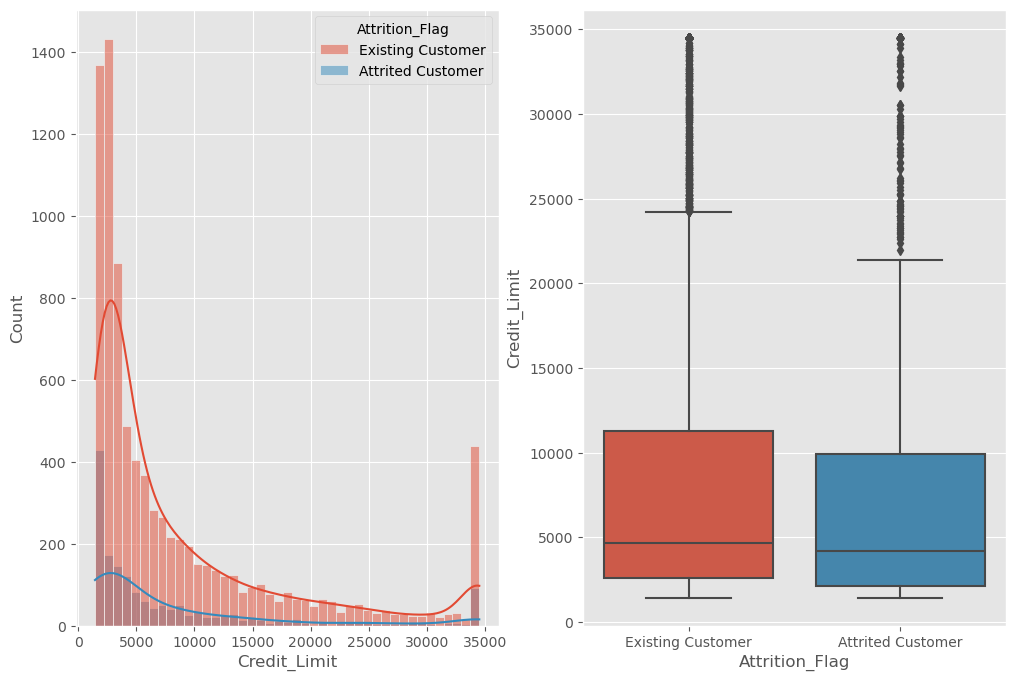

In [368]:
plot_num('Credit_Limit')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


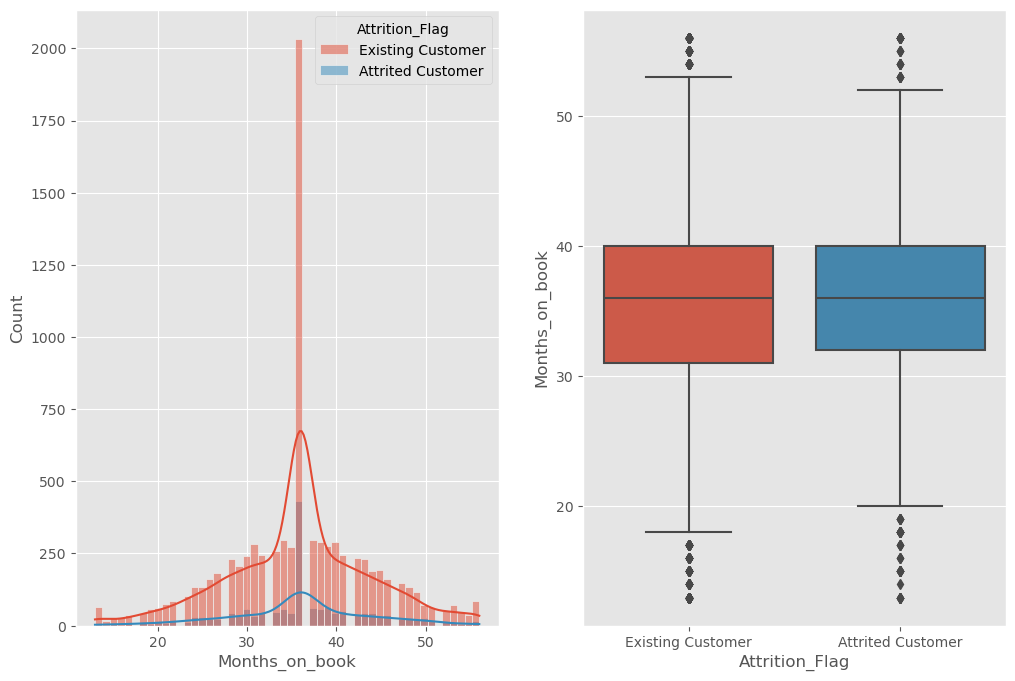

In [369]:
plot_num('Months_on_book')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


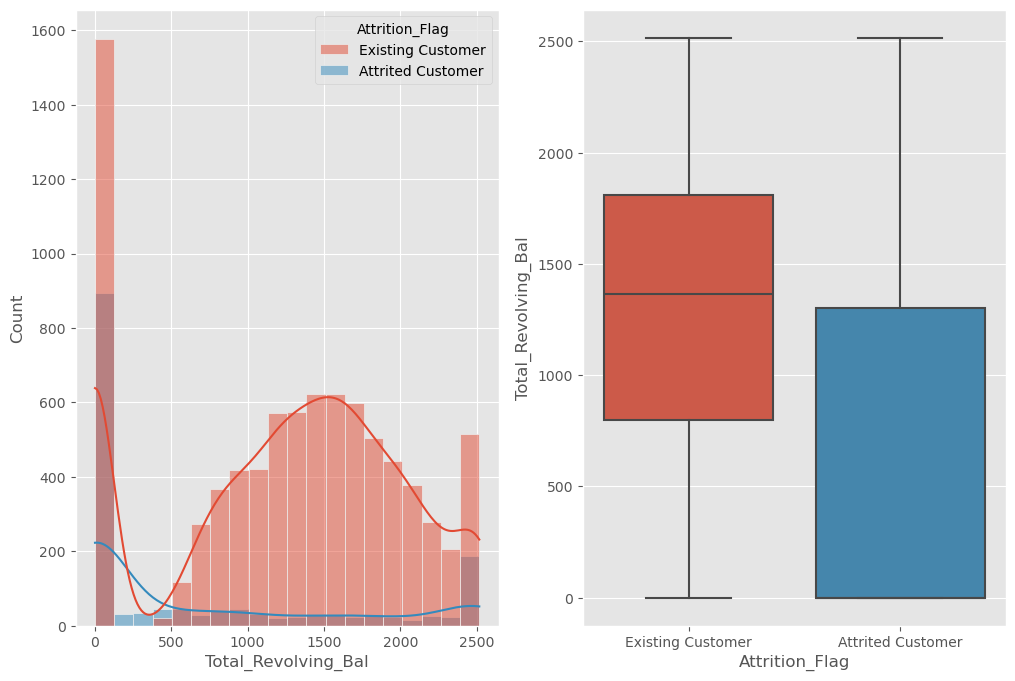

In [370]:
plot_num('Total_Revolving_Bal')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


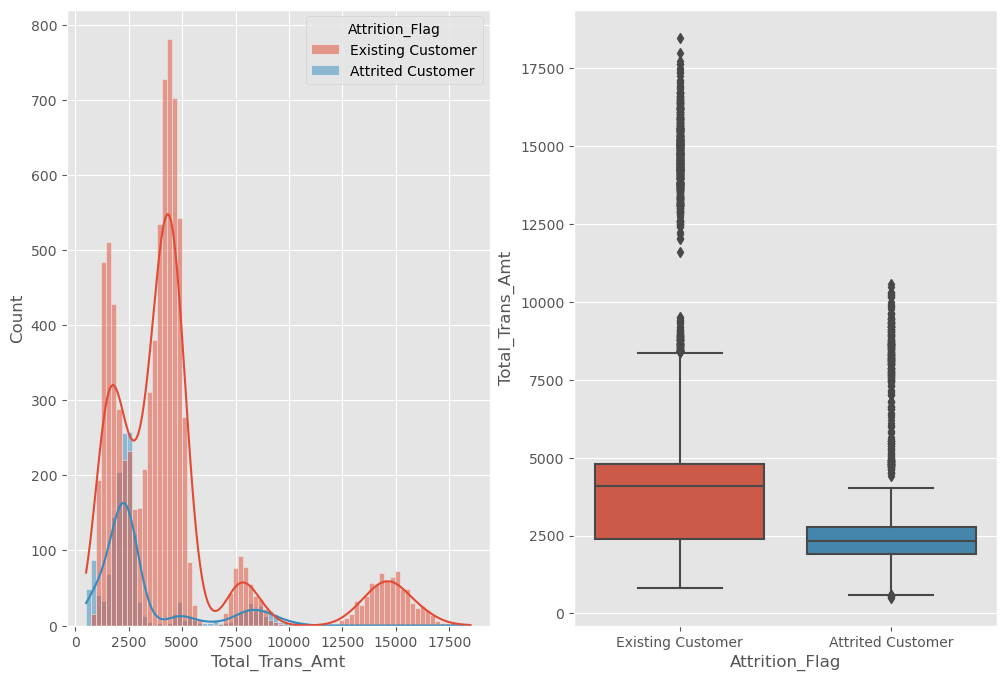

In [371]:
plot_num('Total_Trans_Amt')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


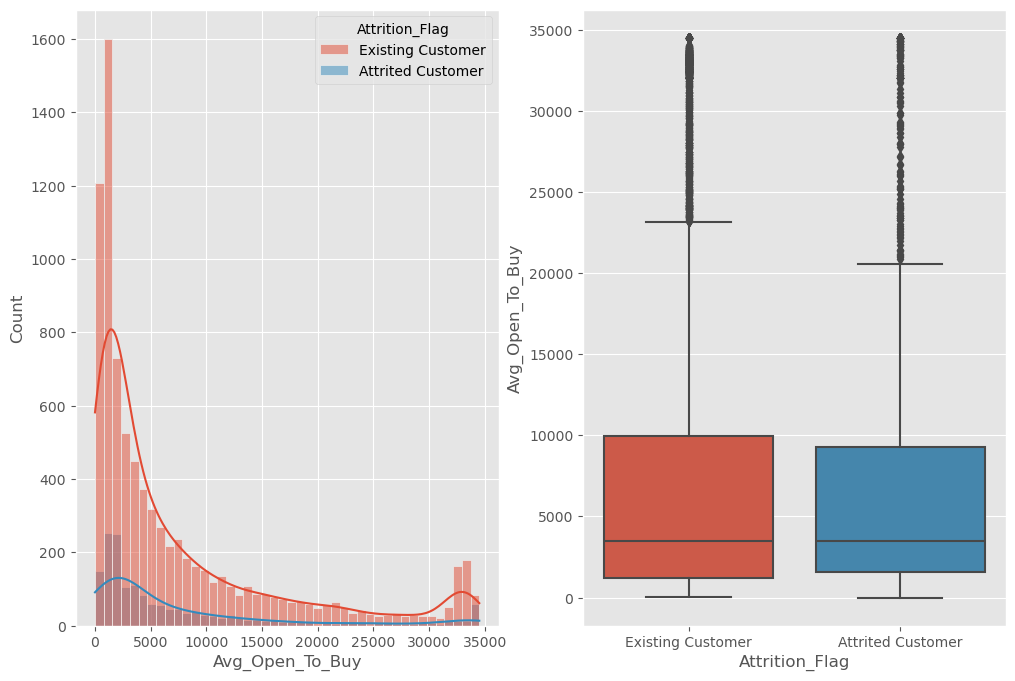

In [372]:
plot_num('Avg_Open_To_Buy')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


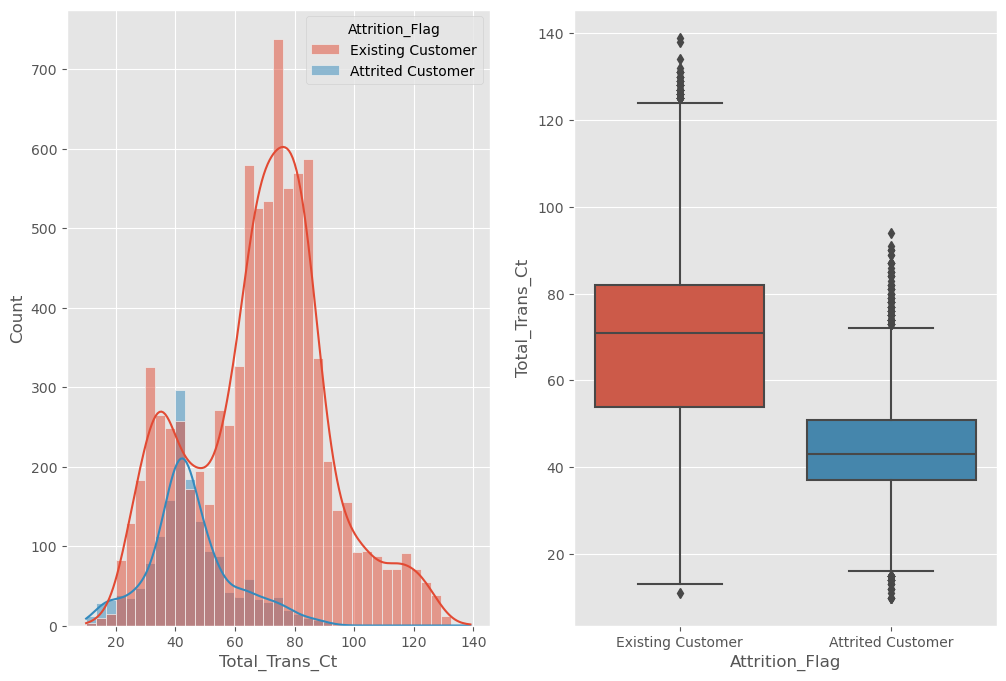

In [373]:
plot_num('Total_Trans_Ct')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


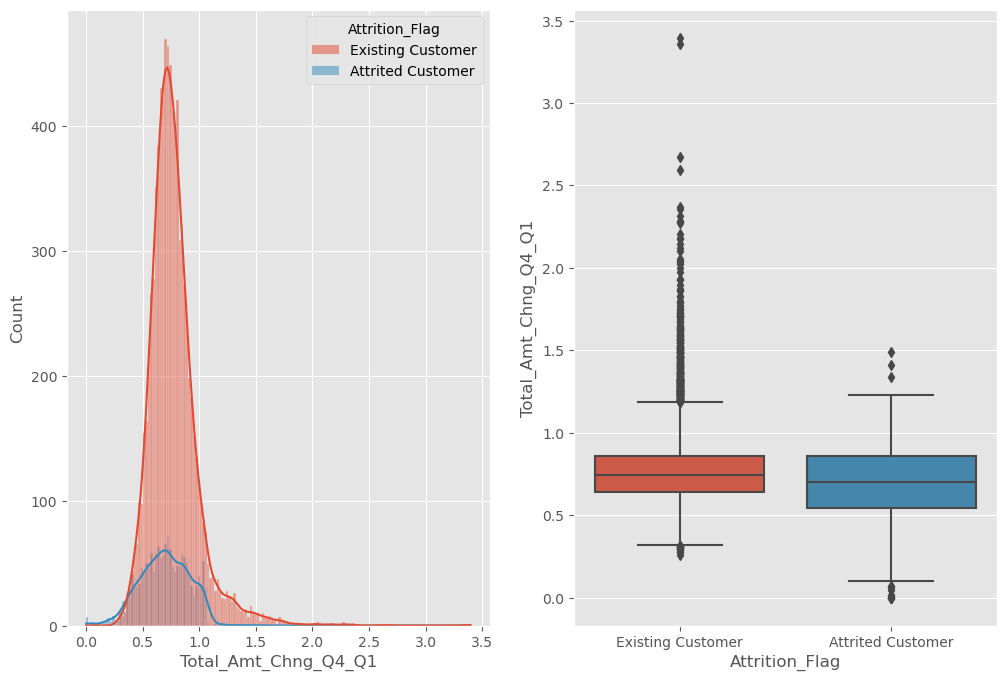

In [374]:
plot_num('Total_Amt_Chng_Q4_Q1')

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


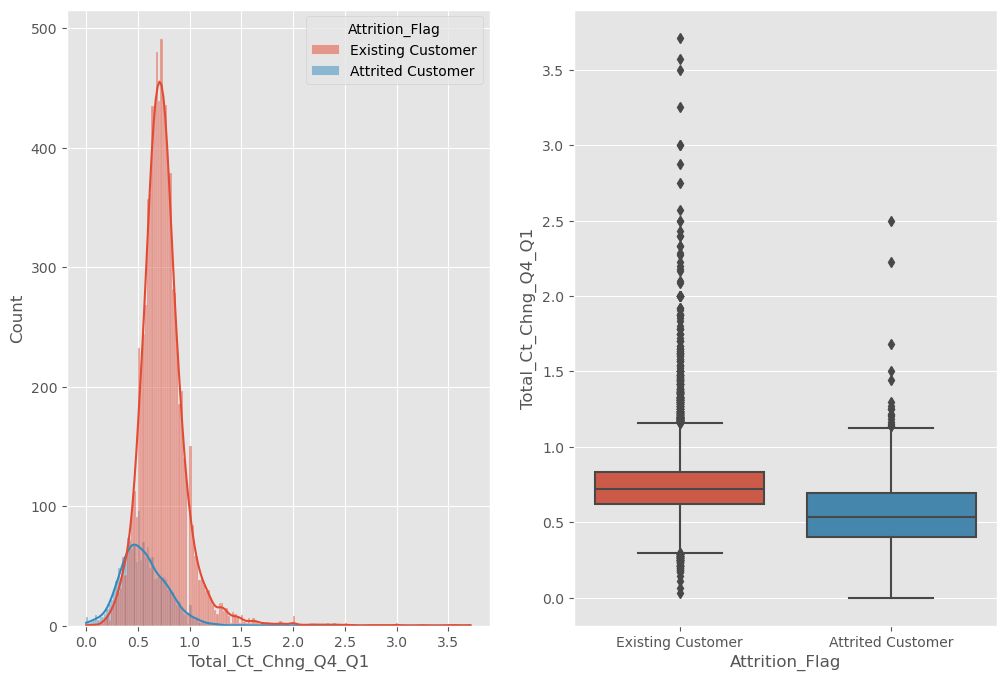

In [375]:
plot_num('Total_Ct_Chng_Q4_Q1')

**Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio seems to have effect on determining whether a customer leave service or not.**

**While Age and month_on_book variable seems irrevalant to decision whether a customer leave service or not.**

In [376]:
num=['Avg_Utilization_Ratio','Customer_Age','Credit_Limit','Months_on_book',
     'Total_Revolving_Bal','Total_Trans_Amt','Avg_Open_To_Buy','Total_Trans_Ct',
     'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

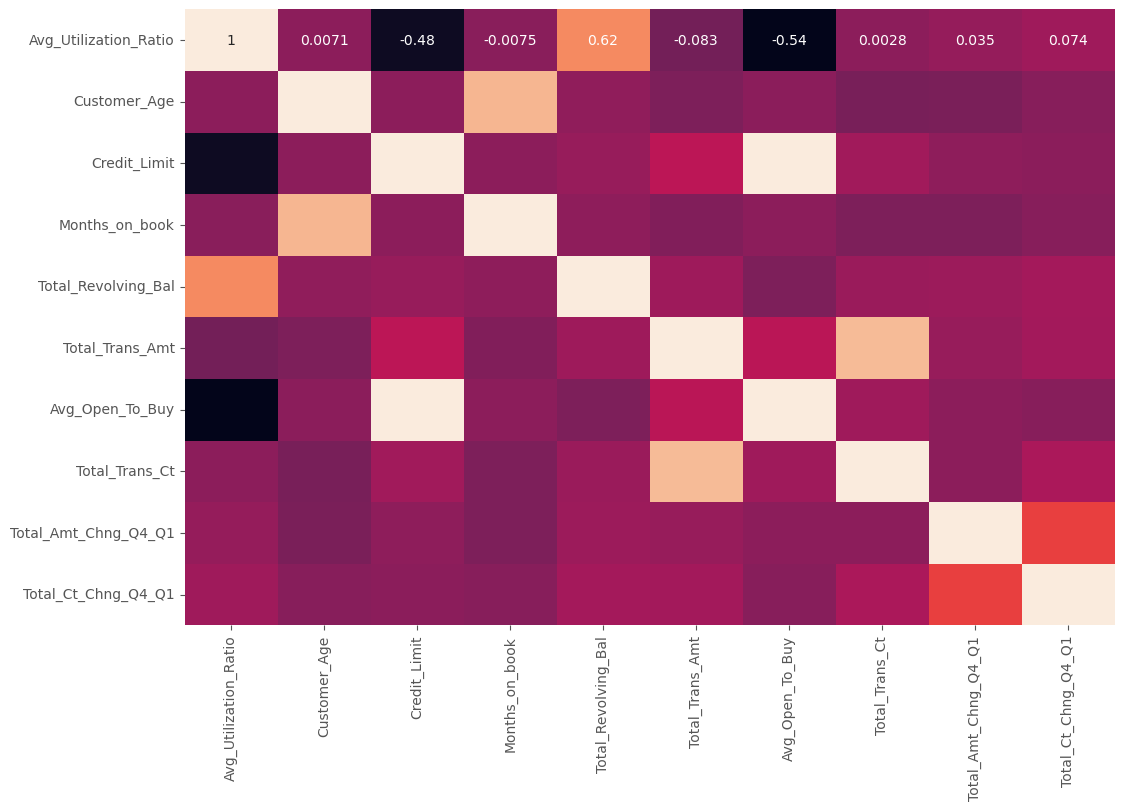

In [377]:
sns.heatmap(data[num].corr(),cbar=False,annot=True);

In [378]:
cat=['Attrition_Flag', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
     'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
     'Contacts_Count_12_mon' ]

In [379]:
def call():
    
    for i in range(len(cat)):
        
        print(data[cat[i]].unique())
        print(data[cat[i]].value_counts())
        print("**"*20+'\n')
        
call()

['Existing Customer' 'Attrited Customer']
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
****************************************

['M' 'F']
Gender
F    5358
M    4769
Name: count, dtype: int64
****************************************

[3 5 4 2 0 1]
Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64
****************************************

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
****************************************

['Married' 'Single' 'Unknown' 'Divorced']
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
****************************************

['$60K - $80K' 'Less than $40K' '$80K - 

In [464]:
data.loc[data["Income_Category"]=="Unknown","Income_Category"]=data["Income_Category"].mode()
data.loc[data["Education_Level"]=="Unknown","Education_Level"]=data["Education_Level"].mode()
data.loc[data["Marital_Status"]=="Unknown","Marital_Status"]=data["Marital_Status"].mode()

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_cat(var):
    plt.figure(figsize=(15, 7))  # Adjust the figure size if needed
    sns.countplot(x=var, hue='Attrition_Flag', data=data)
    
    # Calculate the attrition percentages
    attrition_info = pd.crosstab(data['Attrition_Flag'], data[var])
    Total={}
    attrited_count={}
    percentage_attrited = {}                          
    for i in attrition_info.columns:
        total = attrition_info[i].sum()
        Total[i]=total
        attrited = attrition_info[i][0]
        attrited_count[i]=attrited
        percentage = attrited * 100 / total
        percentage_attrited[i] = str(round(percentage, 2)) + " %"

    for i, v in enumerate(percentage_attrited):
        plt.text(i, max(attrition_info.loc[:, v]) + 2, percentage_attrited[v], ha='center', color='black', fontweight='bold')


    plt.title(f'Countplot of {var} with Attrition Flag')
    plt.show()
    print("Total count",Total)
    print(" ")
    print("Percentage attrited:", percentage_attrited)
    print(" ")
    print("Attrited count",attrited_count)
    


C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


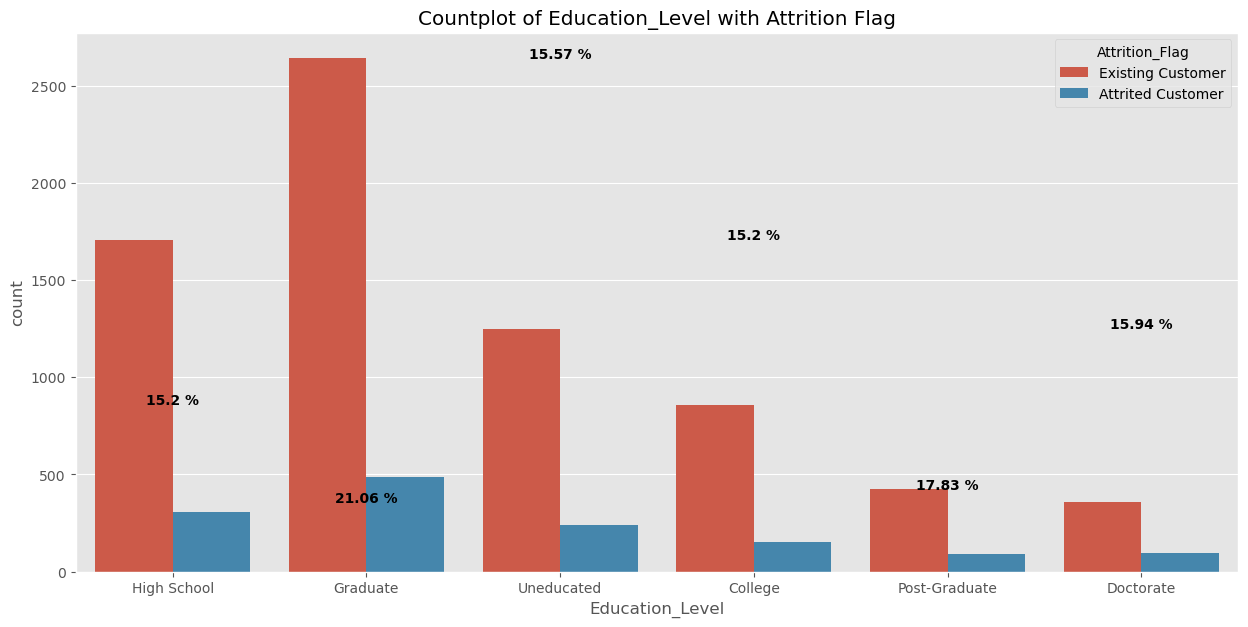

Total count {'College': 1013, 'Doctorate': 451, 'Graduate': 3128, 'High School': 2013, 'Post-Graduate': 516, 'Uneducated': 1487}
 
Percentage attrited: {'College': '15.2 %', 'Doctorate': '21.06 %', 'Graduate': '15.57 %', 'High School': '15.2 %', 'Post-Graduate': '17.83 %', 'Uneducated': '15.94 %'}
 
Attrited count {'College': 154, 'Doctorate': 95, 'Graduate': 487, 'High School': 306, 'Post-Graduate': 92, 'Uneducated': 237}


In [466]:
plot_cat("Education_Level")

-
**There is a higher chance of people with Graduate Education level of being attrited**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


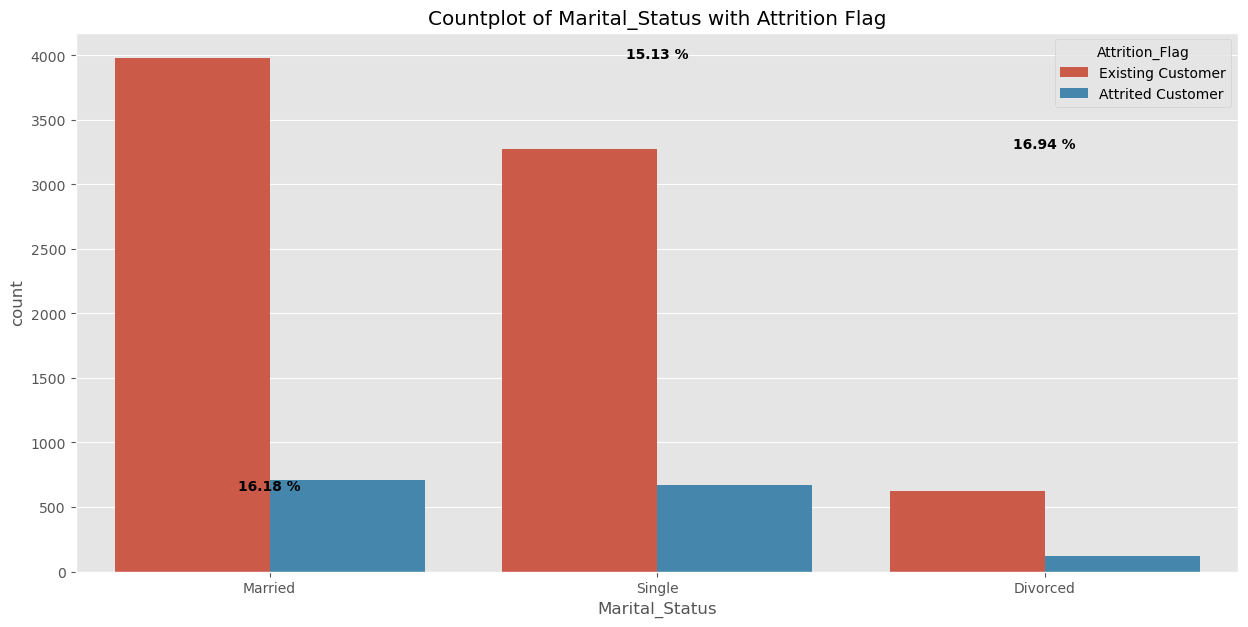

Total count {'Divorced': 748, 'Married': 4687, 'Single': 3943}
 
Percentage attrited: {'Divorced': '16.18 %', 'Married': '15.13 %', 'Single': '16.94 %'}
 
Attrited count {'Divorced': 121, 'Married': 709, 'Single': 668}


In [467]:
plot_cat("Marital_Status")

-
**There is not much difference in attrition percenatages**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


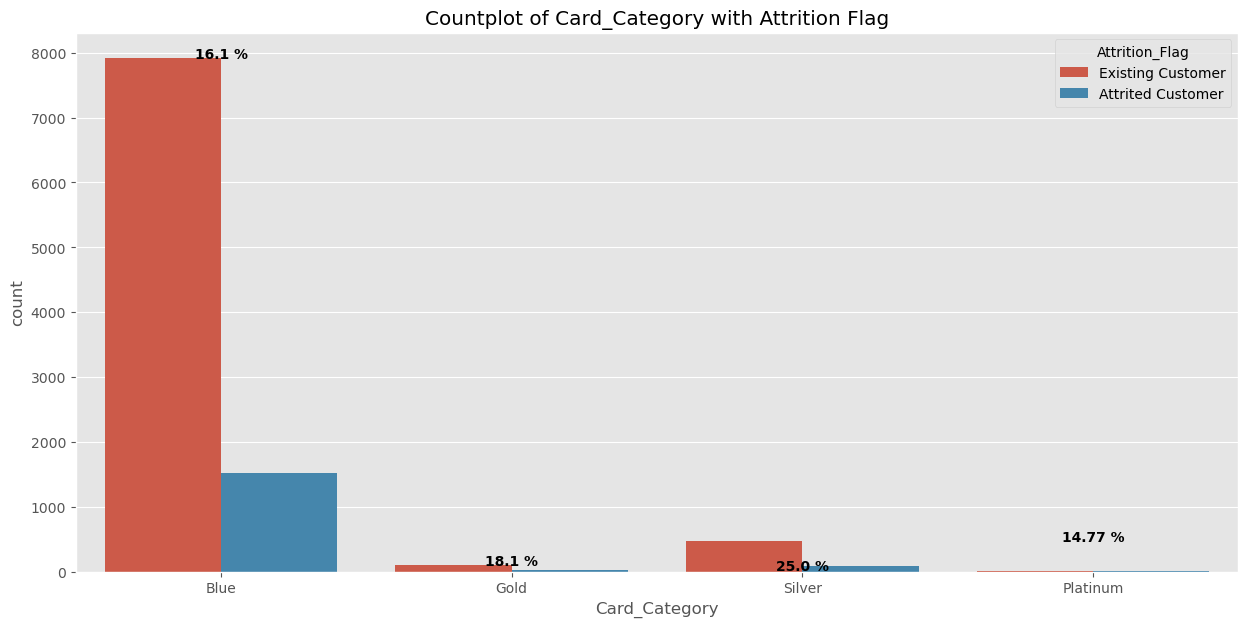

Total count {'Blue': 9436, 'Gold': 116, 'Platinum': 20, 'Silver': 555}
 
Percentage attrited: {'Blue': '16.1 %', 'Gold': '18.1 %', 'Platinum': '25.0 %', 'Silver': '14.77 %'}
 
Attrited count {'Blue': 1519, 'Gold': 21, 'Platinum': 5, 'Silver': 82}


In [468]:
plot_cat("Card_Category")

-
**The customers with silver card has higher chance of being attrited**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


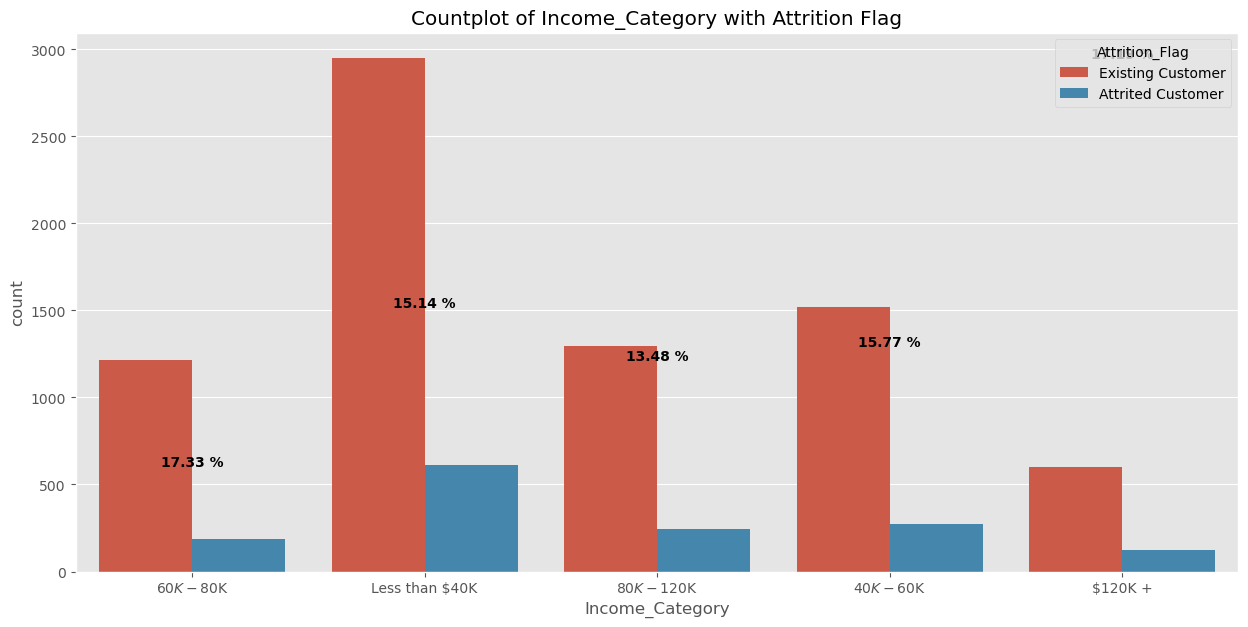

Total count {'$120K +': 727, '$40K - $60K': 1790, '$60K - $80K': 1402, '$80K - $120K': 1535, 'Less than $40K': 3561}
 
Percentage attrited: {'$120K +': '17.33 %', '$40K - $60K': '15.14 %', '$60K - $80K': '13.48 %', '$80K - $120K': '15.77 %', 'Less than $40K': '17.19 %'}
 
Attrited count {'$120K +': 126, '$40K - $60K': 271, '$60K - $80K': 189, '$80K - $120K': 242, 'Less than $40K': 612}


In [469]:
plot_cat("Income_Category")

-
**The customers with income of Less than 40k or 120K + has the higher chance of leaving services**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


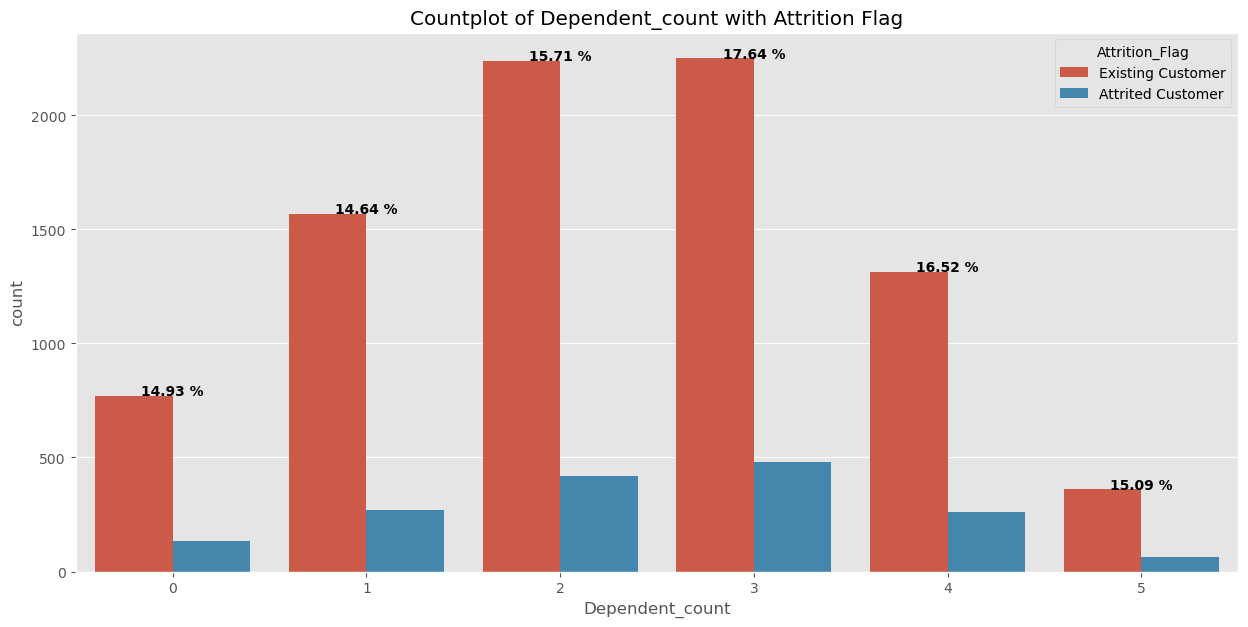

Total count {0: 904, 1: 1838, 2: 2655, 3: 2732, 4: 1574, 5: 424}
 
Percentage attrited: {0: '14.93 %', 1: '14.64 %', 2: '15.71 %', 3: '17.64 %', 4: '16.52 %', 5: '15.09 %'}
 
Attrited count {0: 135, 1: 269, 2: 417, 3: 482, 4: 260, 5: 64}


In [470]:
plot_cat("Dependent_count")

-
**The number of Dependent does't matter as the attrition percentage is more over same with 3 dependent count being highest.**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


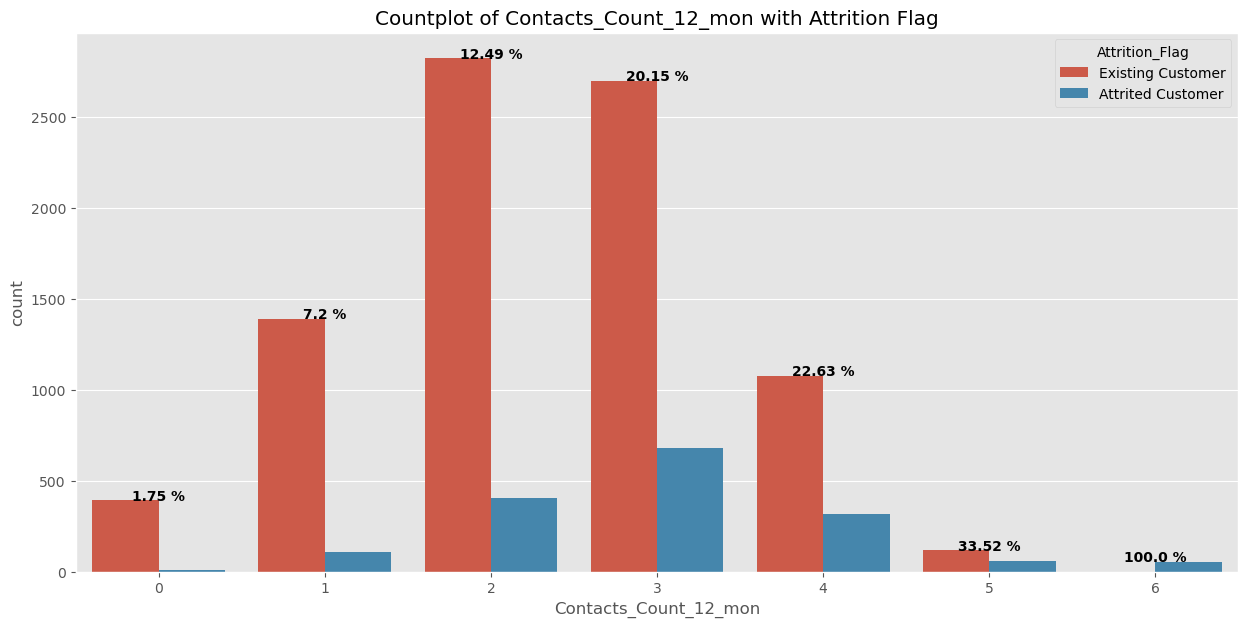

Total count {0: 399, 1: 1499, 2: 3227, 3: 3380, 4: 1392, 5: 176, 6: 54}
 
Percentage attrited: {0: '1.75 %', 1: '7.2 %', 2: '12.49 %', 3: '20.15 %', 4: '22.63 %', 5: '33.52 %', 6: '100.0 %'}
 
Attrited count {0: 7, 1: 108, 2: 403, 3: 681, 4: 315, 5: 59, 6: 54}


In [471]:
plot_cat("Contacts_Count_12_mon")

-
**As the no. of contacts with the customers increases, the percentage of customer leaving the services increases.**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


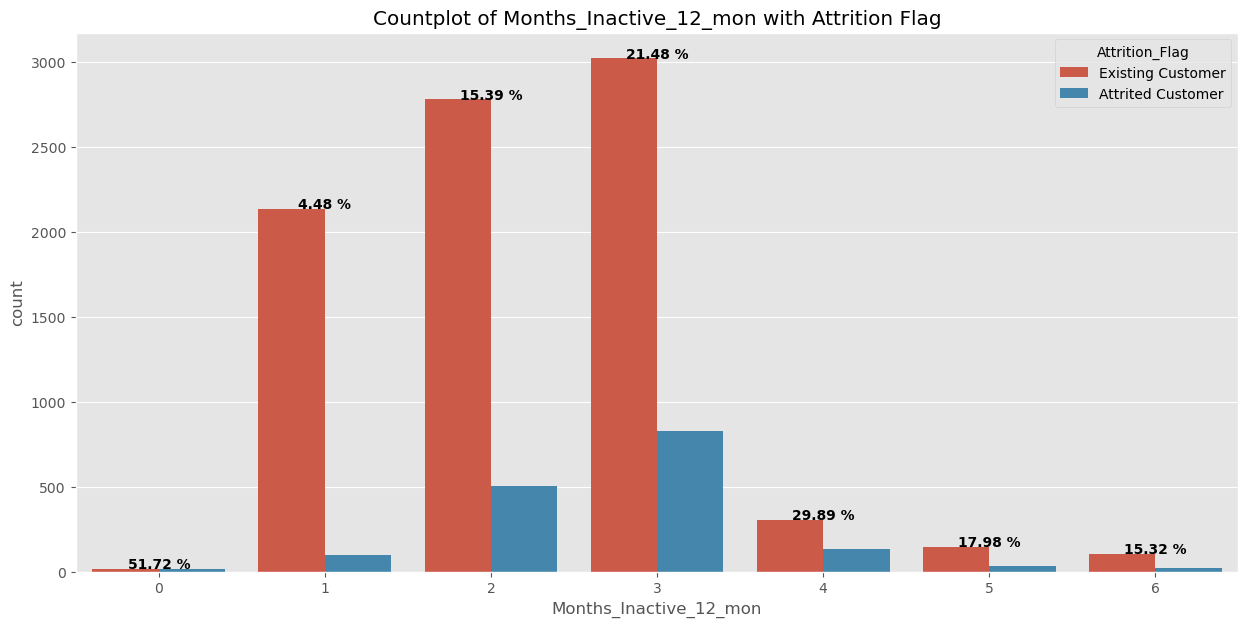

Total count {0: 29, 1: 2233, 2: 3282, 3: 3846, 4: 435, 5: 178, 6: 124}
 
Percentage attrited: {0: '51.72 %', 1: '4.48 %', 2: '15.39 %', 3: '21.48 %', 4: '29.89 %', 5: '17.98 %', 6: '15.32 %'}
 
Attrited count {0: 15, 1: 100, 2: 505, 3: 826, 4: 130, 5: 32, 6: 19}


In [463]:
plot_cat("Months_Inactive_12_mon")

-
**There is high percentage of customers who leave service while being inactive for less than month and in between 3-4 months.**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


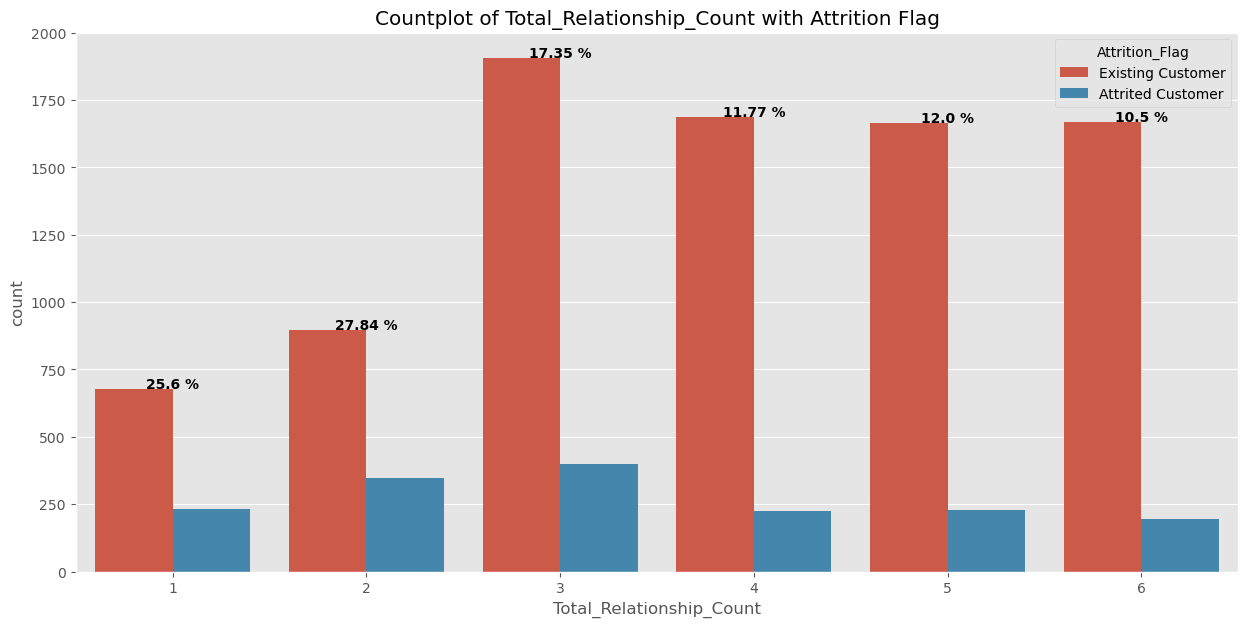

Total count {1: 910, 2: 1243, 3: 2305, 4: 1912, 5: 1891, 6: 1866}
 
Percentage attrited: {1: '25.6 %', 2: '27.84 %', 3: '17.35 %', 4: '11.77 %', 5: '12.0 %', 6: '10.5 %'}
 
Attrited count {1: 233, 2: 346, 3: 400, 4: 225, 5: 227, 6: 196}


In [441]:
plot_cat('Total_Relationship_Count')

-
**Customers having 1 or 2 products have more chances of leaving the services then those helding more products.**

C:\Users\Raj Rohra\AppData\Local\Temp\ipykernel_43388\1912033998.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited = attrition_info[i][0]


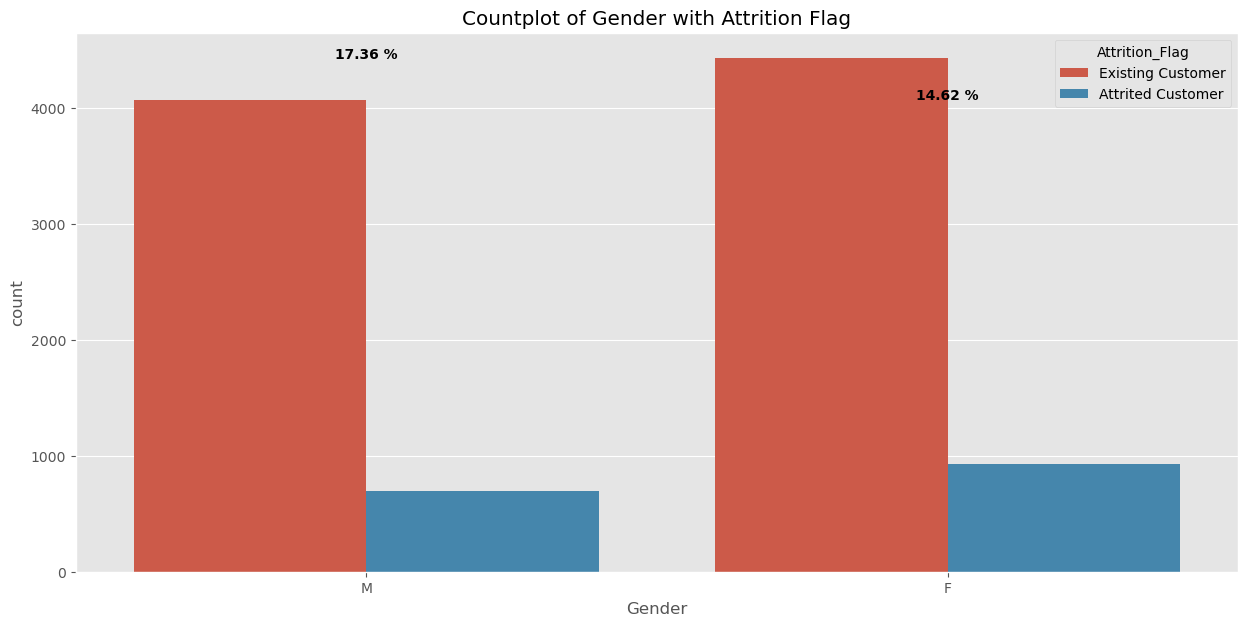

Total count {'F': 5358, 'M': 4769}
 
Percentage attrited: {'F': '17.36 %', 'M': '14.62 %'}
 
Attrited count {'F': 930, 'M': 697}


In [442]:
plot_cat('Gender')

-
**Females have a higher percentage of leaving the services**